<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-February/blob/main/Hierarchy/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: Mall_Customers.csv      


In [3]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.drop("CustomerID", inplace = True, axis = 1)

In [9]:
df.rename(
    columns = {
        "Spending Score (1-100)": "SpendindScore",
        "Annual Income (k$)" : "AnnualIncome"
    }, inplace = True
)

df.head()

,Genre,Age,AnnualIncome,SpendindScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df["Genre"] = df["Genre"].replace({
    "Male": 1,
    "Female": 0
})

df.head()

,Genre,Age,AnnualIncome,SpendindScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


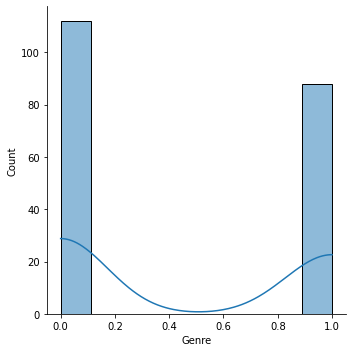

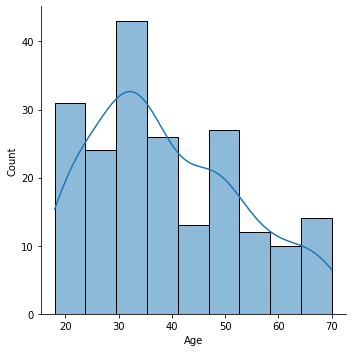

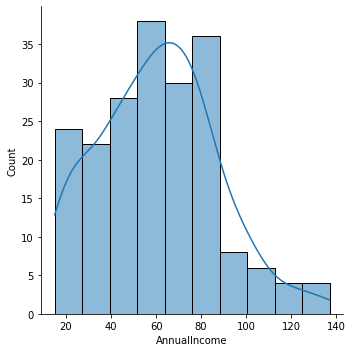

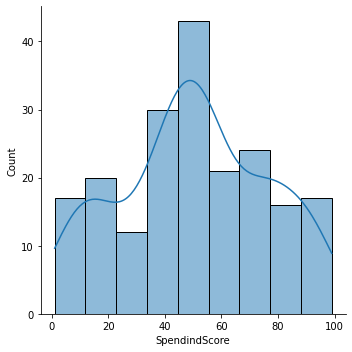

In [11]:
import seaborn as sns

for col in df.columns:
  sns.displot(df[col], kde = True)

In [62]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

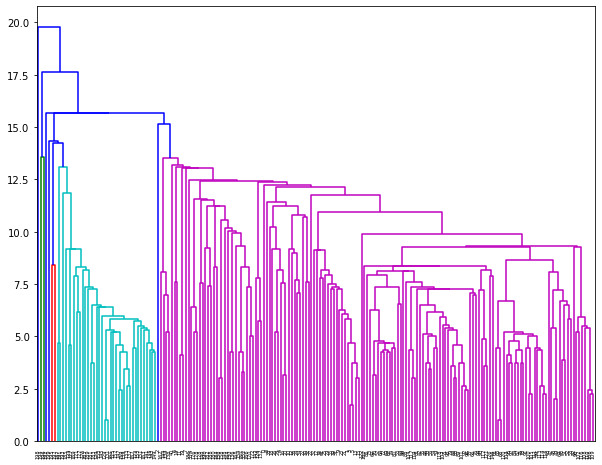

In [19]:
merg = linkage(df, method='single', metric='euclidean')

plt.figure(figsize = (10, 8))
dendrogram(merg)
plt.show()

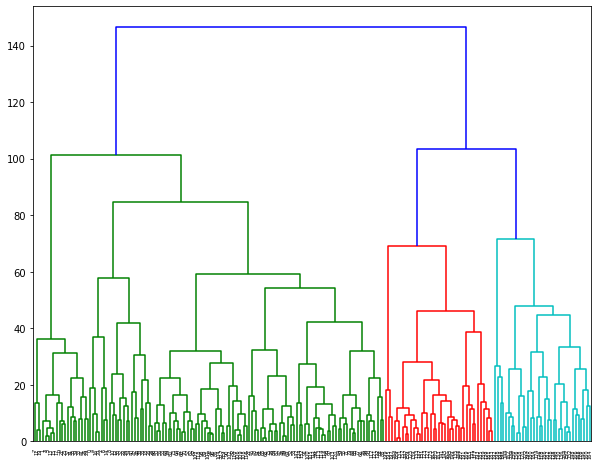

In [20]:
from scipy.cluster.hierarchy import linkage

merg = linkage(df, method='complete', metric='euclidean')

plt.figure(figsize = (10, 8))
dendrogram(merg)
plt.show()

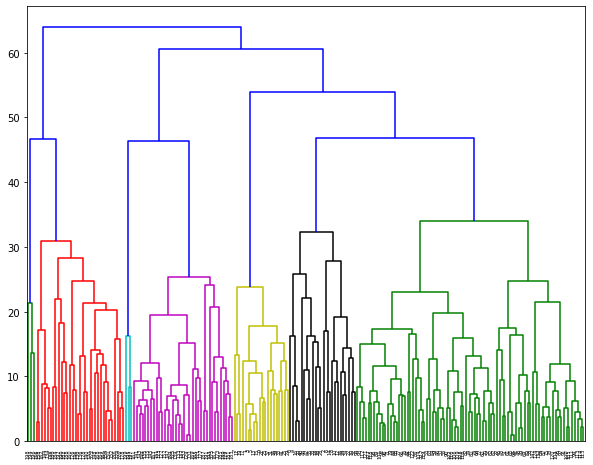

In [21]:
from scipy.cluster.hierarchy import linkage

merg = linkage(df, method='average', metric='euclidean')

plt.figure(figsize = (10, 8))
dendrogram(merg)
plt.show()

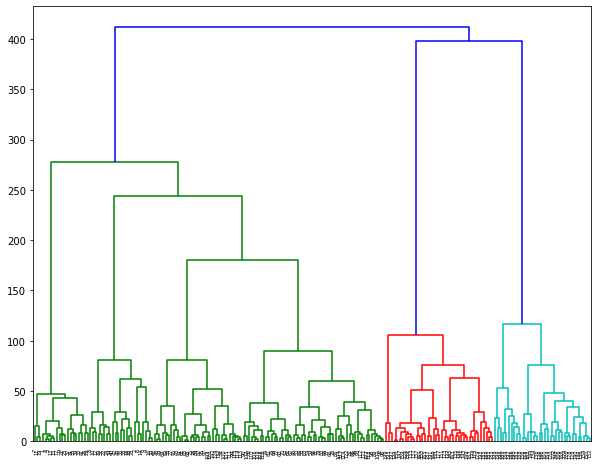

In [22]:
from scipy.cluster.hierarchy import linkage

merg = linkage(df, method='ward', metric='euclidean')

plt.figure(figsize = (10, 8))
dendrogram(merg)
plt.show()

In [23]:
from scipy.cluster.hierarchy import cut_tree

y_pred = cut_tree(merg, n_clusters=3)

In [26]:
y_pred = y_pred.reshape(-1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [27]:
df.head(1)

,Genre,Age,AnnualIncome,SpendindScore
0,1,19,15,39


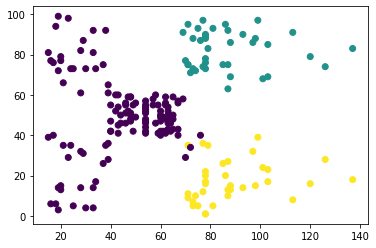

In [29]:
plt.scatter(df["AnnualIncome"], df["SpendindScore"], c = y_pred)

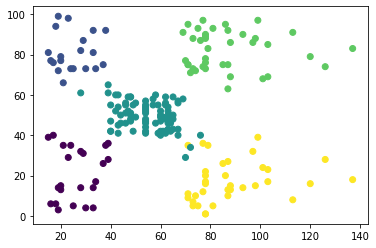

In [30]:
from scipy.cluster.hierarchy import cut_tree

y_pred = cut_tree(merg, n_clusters=5)
y_pred = y_pred.reshape(-1)
plt.scatter(df["AnnualIncome"], df["SpendindScore"], c = y_pred)


In [31]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

y_pred = agg.fit_predict(df)

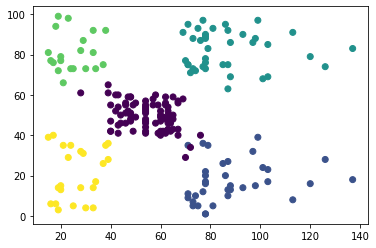

In [32]:
plt.scatter(df["AnnualIncome"], df["SpendindScore"], c = y_pred)

In [36]:
import plotly.express as px

px.scatter_3d(df, x = "Age",	y = "AnnualIncome",	z = "SpendindScore", color = y_pred)

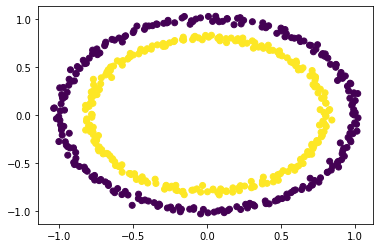

In [44]:
from sklearn.datasets import make_circles

X , y = make_circles(n_samples=500, noise = 0.02, random_state = 40)
plt.scatter(X[:, 0], X[:, 1], c = y)

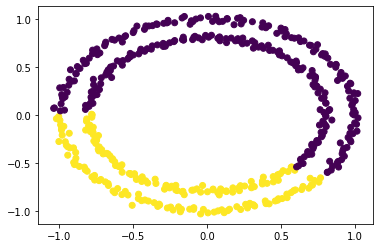

In [48]:
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_pred = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_pred)

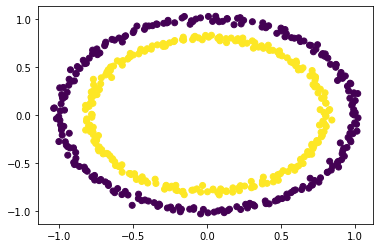

In [49]:
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
y_pred = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_pred)

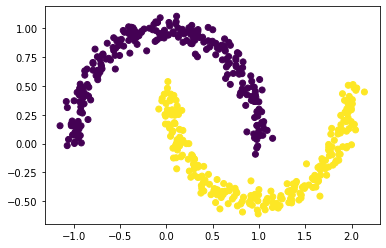

In [56]:
from sklearn.datasets import make_moons

X , y = make_moons(n_samples=500, noise = 0.06, random_state = 40)
plt.scatter(X[:, 0], X[:, 1], c = y)

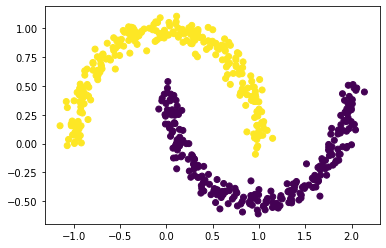

In [61]:
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
y_pred = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_pred)